## Before Separation

[array([0.29704, 0.14235, 0.17735, 0.05167, 0.08067, 0.09434]), array([0.34854, 0.33851, 0.12127, 0.067  , 0.04327, 0.12727]), array([0.32147, 0.50641, 0.16294, 0.05147, 0.04047, 0.089  ])]


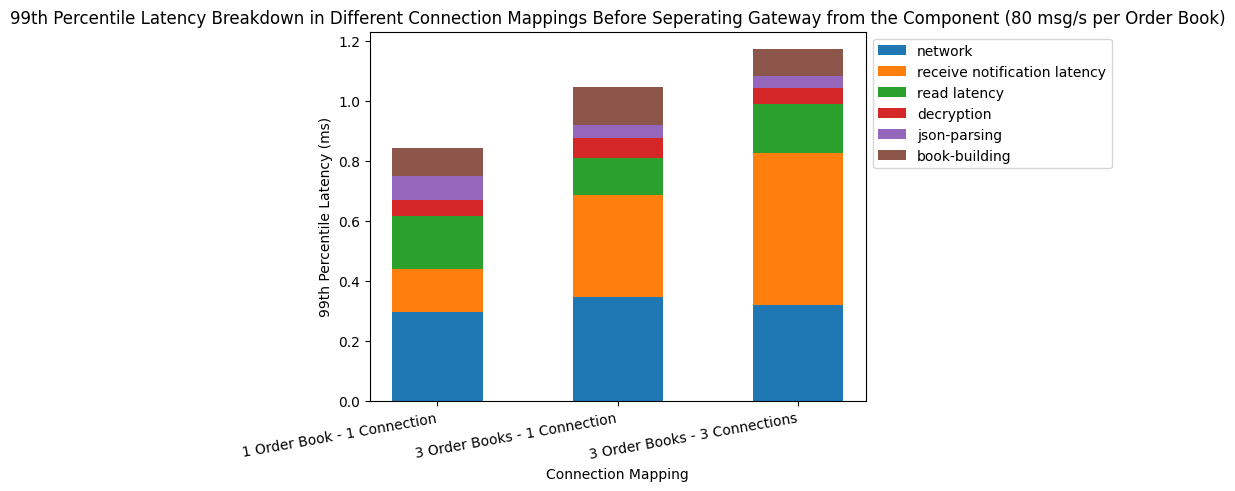

In [110]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            if all(val < 2 for val in values) and values[0] < 0.5:
                filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("before-separation-mapping-kraken-book-builder/single-1-80-kraken.txt"))
files.append(filter_lines("before-separation-mapping-kraken-book-builder/single-3-80-kraken.txt"))
files.append(filter_lines("before-separation-mapping-kraken-book-builder/multi-3-80-kraken.txt"))

types = (
    "1 Order Book - 1 Connection",
    "3 Order Books - 1 Connection",
    "3 Order Books - 3 Connections",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "network": np.array([processed_data[0] for processed_data in processed_datas]),
    "receive notification latency": np.array([processed_data[1] for processed_data in processed_datas]),
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
    "decryption": np.array([processed_data[3] for processed_data in processed_datas]),
    "json-parsing": np.array([processed_data[4] for processed_data in processed_datas]),
    "book-building": np.array([processed_data[5] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency)
    total_latency += latency

ax.set_title("99th Percentile Latency Breakdown in Different Connection Mappings Before Seperating Gateway from the Component (80 msg/s per Order Book)")

ax.set_xlabel('Connection Mapping')
ax.set_ylabel('99th Percentile Latency (ms)') 
plt.xticks(rotation=10, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()


## After Separation - 80



[array([0.29426, 0.037  , 0.04204, 0.03652, 0.08752, 0.09526]), array([0.292  , 0.023  , 0.06282, 0.037  , 0.135  , 0.055  ]), array([0.26927, 0.025  , 0.08581, 0.02   , 0.07481, 0.086  ])]


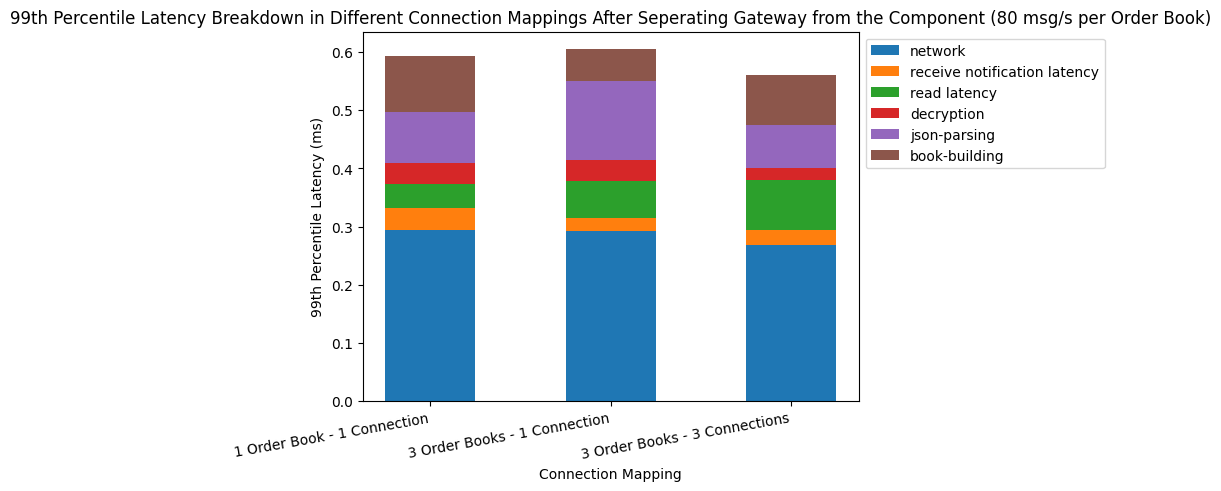

In [108]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            if all(val < 1 for val in values) and values[0] < 0.3:
                filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("after-separation-kraken-book-builder/single-1-80.txt"))
files.append(filter_lines("after-separation-kraken-book-builder/single-3-80.txt"))
files.append(filter_lines("after-separation-kraken-book-builder/multi-3-80.txt"))

types = (
    "1 Order Book - 1 Connection",
    "3 Order Books - 1 Connection",
    "3 Order Books - 3 Connections",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "network": np.array([processed_data[0] for processed_data in processed_datas]),
    "receive notification latency": np.array([processed_data[1] for processed_data in processed_datas]),
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
    "decryption": np.array([processed_data[3] for processed_data in processed_datas]),
    "json-parsing": np.array([processed_data[4] for processed_data in processed_datas]),
    "book-building": np.array([processed_data[5] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency)
    total_latency += latency

ax.set_title("99th Percentile Latency Breakdown in Different Connection Mappings After Seperating Gateway from the Component (80 msg/s per Order Book)")

ax.set_xlabel('Connection Mapping')
ax.set_ylabel('99th Percentile Latency (ms)') 
plt.xticks(rotation=10, ha='right')

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## After Separation - 240

[array([4.079620e+00, 2.000000e-02, 5.302000e-02, 1.200000e-02,
       1.870434e+01, 5.600000e-02]), array([6.045648e+01, 2.116000e-02, 5.716000e-02, 1.500000e-02,
       1.180000e-01, 4.700000e-02])]


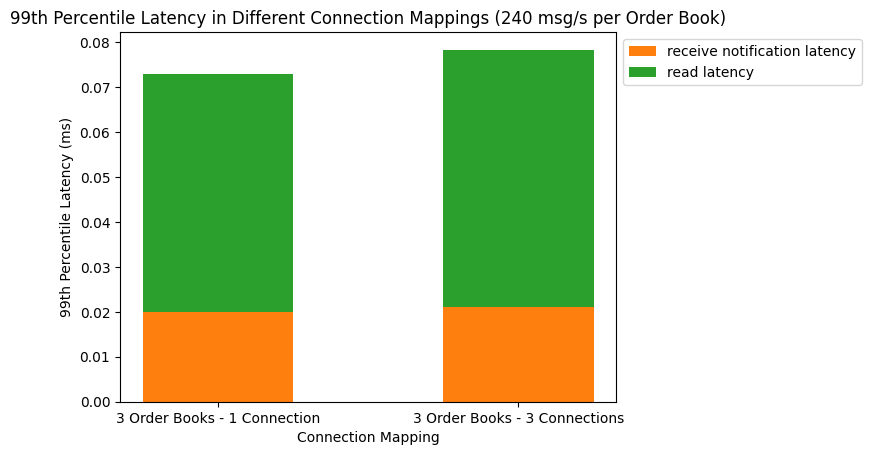

In [342]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            # values = [float(val) for val in line.strip().split(',')]
            # if all(val < 1 for val in values):
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("after-separation-kraken-book-builder/single-3-240.txt"))
files.append(filter_lines("after-separation-kraken-book-builder/multi-3-240.txt"))

types = (
    "3 Order Books - 1 Connection",
    "3 Order Books - 3 Connections",
)
# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "receive notification latency": np.array([processed_data[1] for processed_data in processed_datas]),
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

colors = ['#ff7f0e', '#2ca02c']  # Specify colors for each stage
for stage, latency, color in zip(latency_percentiles_99.keys(), latency_percentiles_99.values(), colors):
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color=color)
    total_latency += latency

ax.set_title("99th Percentile Latency in Different Connection Mappings (240 msg/s per Order Book)")

ax.set_xlabel('Connection Mapping')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()  

## After Separation - 500

[array([13.29149,  0.03049,  0.10449,  0.026  ,  0.117  ,  0.12   ]), array([5.602208e+01, 2.500000e-02, 1.080000e-01, 1.500000e-02,
       3.626000e-01, 4.234000e-02])]


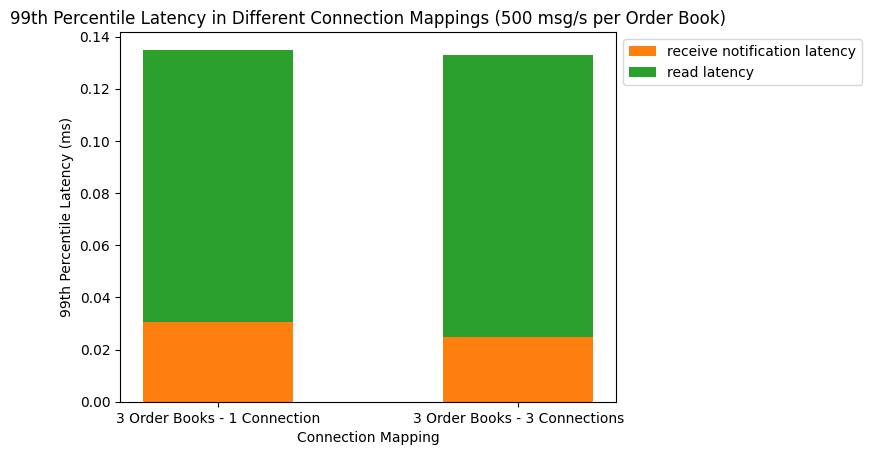

In [341]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            # values = [float(val) for val in line.strip().split(',')]
            # if all(val < 1 for val in values):
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("after-separation-kraken-book-builder/single-3-500.txt"))
files.append(filter_lines("after-separation-kraken-book-builder/multi-3-500.txt"))

types = (
    "3 Order Books - 1 Connection",
    "3 Order Books - 3 Connections",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "receive notification latency": np.array([processed_data[1] for processed_data in processed_datas]),
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

colors = ['#ff7f0e', '#2ca02c']  # Specify colors for each stage
for stage, latency, color in zip(latency_percentiles_99.keys(), latency_percentiles_99.values(), colors):
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color=color)
    total_latency += latency


ax.set_title("99th Percentile Latency in Different Connection Mappings (500 msg/s per Order Book)")

ax.set_xlabel('Connection Mapping')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## Polling and Reading 

### epoll - io_recv

[array([5.22591e+01, 2.60000e-02, 7.00000e-02, 3.70000e-02, 1.84000e-01,
       5.60000e-02]), array([0.31143, 0.04843, 0.11843, 0.05   , 0.15   , 0.14543]), array([4.079620e+00, 2.000000e-02, 5.302000e-02, 1.200000e-02,
       1.870434e+01, 5.600000e-02]), array([13.29149,  0.03049,  0.10449,  0.026  ,  0.117  ,  0.12   ]), array([9.273168e+01, 1.800000e-02, 6.068000e-02, 3.200000e-02,
       1.290000e-01, 1.056800e-01]), array([5.416412e+01, 2.264000e-02, 7.000000e-02, 3.200000e-02,
       1.136400e-01, 5.600000e-02])]


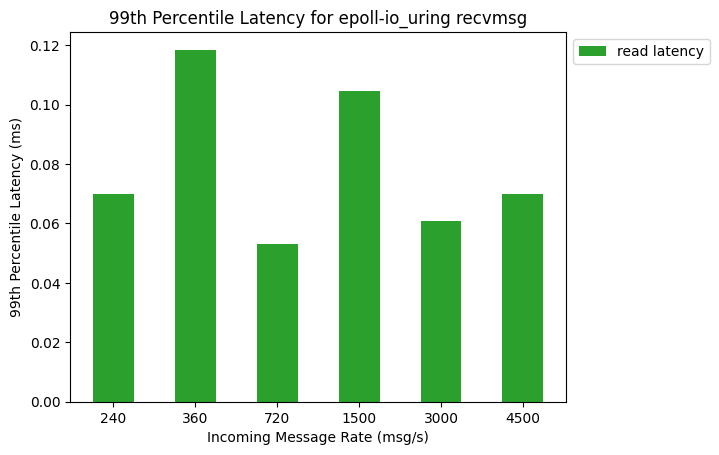

In [340]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            #if values[1] < 0.5 and values[2] < 0.5:
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-80.txt"))
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-240.txt"))
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-500.txt"))

files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-240.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-360.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-720.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-1500.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-3000.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-io_recv-4500.txt"))

types = (
    "240",
    "360",
    "720",
    "1500",
    "3000",
    "4500",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color="#2ca02c")
    total_latency += latency

ax.set_title("99th Percentile Latency for epoll-io_uring recvmsg")

ax.set_xlabel('Incoming Message Rate (msg/s)')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### io-poll - io_recv

[array([ 3.9336000e-01, -8.6313232e+02,  4.8198000e-01,  4.9000000e-02,
        1.6734000e-01,  1.4734000e-01]), array([ 4.1400000e-01, -1.2254098e+03,  4.2782000e-01,  4.7000000e-02,
        1.6204000e-01,  1.4500000e-01]), array([ 3.8172000e-01, -7.1846539e+02,  4.9693000e-01,  4.5000000e-02,
        1.2993000e-01,  1.1700000e-01]), array([ 3.308104e+01, -5.360480e+02,  8.659600e-01,  3.700000e-02,
        1.499600e-01,  1.060000e-01]), array([ 8.4155340e+01, -2.9177951e+02,  2.0515600e+00,  3.3000000e-02,
        2.5534000e-01,  8.4670000e-02]), array([ 1.5764798e+02, -2.0017843e+02,  1.9656300e+00,  2.7000000e-02,
        1.1500000e-01,  4.9000000e-02])]


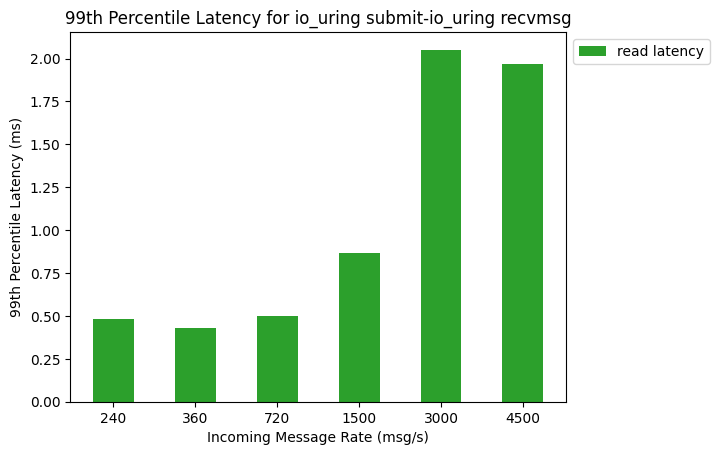

In [339]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            # if values[1] < 0.5 and values[2] < 0.5:
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-80.txt"))
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-240.txt"))
# files.append(filter_lines("after-separation-kraken-book-builder/single-3-500.txt"))

files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-240.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-360.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-720.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-1500.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-3000.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/io-poll-io_recv-4500.txt"))

types = (
    "240",
    "360",
    "720",
    "1500",
    "3000",
    "4500",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color='#2ca02c',)
    total_latency += latency

ax.set_title("99th Percentile Latency for io_uring submit-io_uring recvmsg")

ax.set_xlabel('Incoming Message Rate (msg/s)')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

### epoll- recv_msg

[array([0.217  , 0.05325, 0.0925 , 0.04725, 0.25325, 0.128  ]), array([0.19516, 0.04427, 0.099  , 0.048  , 0.16427, 0.11754]), array([0.445  , 0.042  , 0.07504, 0.03752, 0.119  , 0.073  ]), array([13.49425,  0.037  ,  0.064  ,  0.036  ,  0.13045,  0.066  ]), array([6.260659e+01, 3.000000e-02, 4.900000e-02, 3.159000e-02,
       9.100000e-02, 5.800000e-02]), array([5.778565e+01, 2.865000e-02, 4.665000e-02, 3.200000e-02,
       9.265000e-02, 6.400000e-02])]


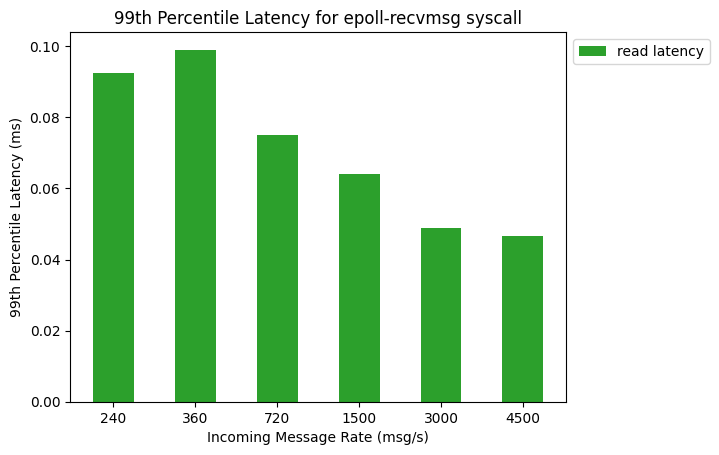

In [338]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            # if values[1] < 0.5 and values[2] < 0.5:
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-240.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-360.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-720.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-1500.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-3000.txt"))
files.append(filter_lines("polling-and-reading-book-builder-data/epoll-recv_msg-4500.txt"))

types = (
    "240",
    "360",
    "720",
    "1500",
    "3000",
    "4500",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))

for stage, latency in latency_percentiles_99.items():
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color='#2ca02c')
    total_latency += latency

ax.set_title("99th Percentile Latency for epoll-recvmsg syscall")

ax.set_xlabel('Incoming Message Rate (msg/s)')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

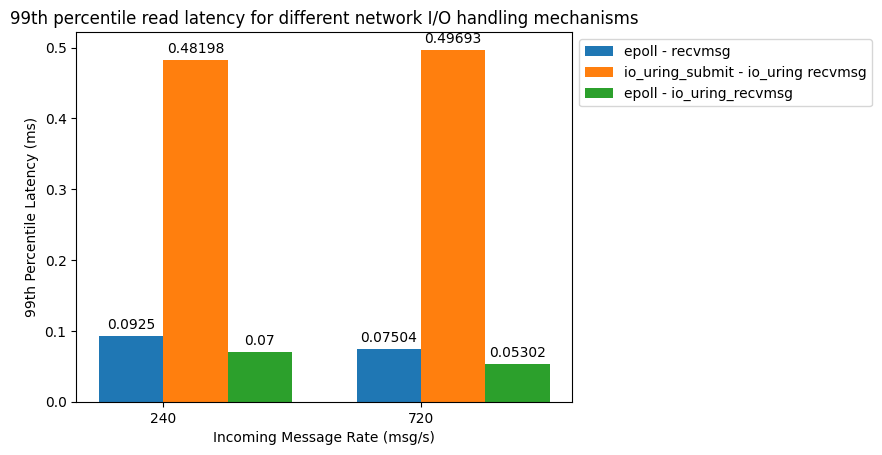

In [311]:
import numpy as np
import matplotlib.pyplot as plt

# Function to filter lines based on the condition
def filter_lines(file_path):
    """
    Filters lines from a file based on a condition.

    Args:
        file_path (str): Path to the file.

    Returns:
        list: List of filtered lines.
    """
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            # Add line to filtered lines if condition met
            # if values[1] < 0.5 and values[2] < 0.5:
            filtered_lines.append(line)
    return filtered_lines

# File paths for data files
file_paths_240 = [
    "polling-and-reading-book-builder-data/epoll-recv_msg-240.txt",
    "polling-and-reading-book-builder-data/io-poll-io_recv-240.txt",
    "polling-and-reading-book-builder-data/epoll-io_recv-240.txt"
]

file_paths_other = [
    "polling-and-reading-book-builder-data/epoll-recv_msg-720.txt",
    "polling-and-reading-book-builder-data/io-poll-io_recv-720.txt",
    "polling-and-reading-book-builder-data/epoll-io_recv-720.txt"
]

file_paths_another = [
    "polling-and-reading-book-builder-data/epoll-recv_msg-1500.txt",
    "polling-and-reading-book-builder-data/io-poll-io_recv-1500.txt",
    "polling-and-reading-book-builder-data/epoll-io_recv-1500.txt"
]

# Filter lines from files
filtered_lines_240 = [filter_lines(file_path) for file_path in file_paths_240]
filtered_lines_other = [filter_lines(file_path) for file_path in file_paths_other]
filtered_lines_another = [filter_lines(file_path) for file_path in file_paths_another]

# Convert filtered lines into NumPy arrays
datas_240 = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in filtered_lines_240]
datas_other = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in filtered_lines_other]
datas_another = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in filtered_lines_another]


# Calculate the 99th percentile for each column
processed_datas_240 = [np.percentile(data, 99, axis=0) for data in datas_240]
processed_datas_other = [np.percentile(data, 99, axis=0) for data in datas_other]
processed_datas_another = [np.percentile(data, 99, axis=0) for data in datas_another]

# Extract latency percentiles
latency_percentiles_99_240 = np.array([processed_data[2] for processed_data in processed_datas_240])
latency_percentiles_99_other = np.array([processed_data[2] for processed_data in processed_datas_other])
latency_percentiles_99_another = np.array([processed_data[2] for processed_data in processed_datas_another])

# Define message rates and IO handling mechanisms
message_rates = ("240", "720")
io_handling_mechanisms = {
    'epoll - recvmsg': (latency_percentiles_99_240[0], latency_percentiles_99_other[0]),
    'io_uring_submit - io_uring recvmsg': (latency_percentiles_99_240[1], latency_percentiles_99_other[1]),
    'epoll - io_uring_recvmsg': (latency_percentiles_99_240[2], latency_percentiles_99_other[2]),
}

# Plotting
x = np.arange(len(message_rates))  # the label locations
width = 0.25  # the width of the bars
multiplier = 0

fig, ax = plt.subplots()

for attribute, measurement in io_handling_mechanisms.items():
    offset = width * multiplier
    rects = ax.bar(x + offset, measurement, width, label=attribute)
    ax.bar_label(rects, padding=3)
    multiplier += 1

# Add labels and title
ax.set_ylabel('99th Percentile Latency (ms)')
ax.set_xlabel('Incoming Message Rate (msg/s)')
ax.set_title('99th percentile read latency for different network I/O handling mechanisms')
ax.set_xticks(x + width / 2)
ax.set_xticklabels(message_rates)
ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()

## number of Order Books 


[array([13.5206 ,  0.04166,  0.07432,  0.03666,  0.09632,  0.10364]), array([5.22591e+01, 2.60000e-02, 7.00000e-02, 3.70000e-02, 1.84000e-01,
       5.60000e-02]), array([0.433, 0.035, 0.086, 0.039, 0.14 , 0.147]), array([0.44784, 0.03742, 0.10026, 0.035  , 0.17042, 0.135  ]), array([13.29149,  0.03049,  0.10449,  0.026  ,  0.117  ,  0.12   ]), array([9.273168e+01, 1.800000e-02, 6.068000e-02, 3.200000e-02,
       1.290000e-01, 1.056800e-01]), array([5.416412e+01, 2.264000e-02, 7.000000e-02, 3.200000e-02,
       1.136400e-01, 5.600000e-02])]


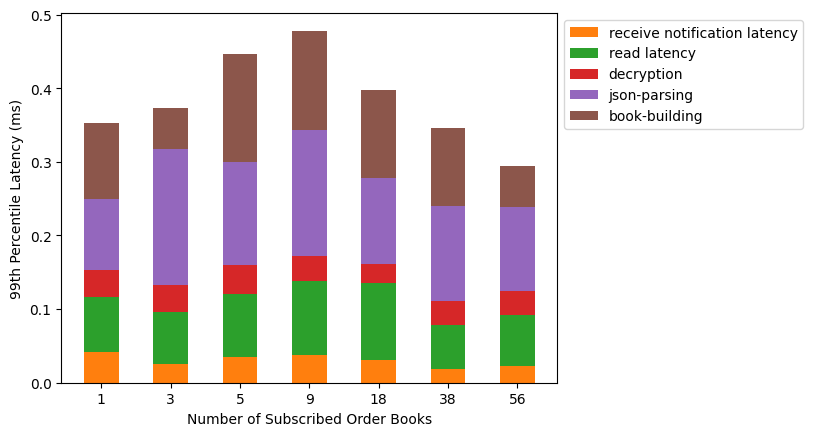

In [1]:
import matplotlib.pyplot as plt
import numpy as np

files = []

# Function to filter lines based on the condition
def filter_lines(file_path):
    filtered_lines = []
    with open(file_path, "r") as file:
        for line in file:
            values = [float(val) for val in line.strip().split(',')]
            #if values[4] < 0.4:
            filtered_lines.append(line)
    return filtered_lines

# Read and filter each file
files.append(filter_lines("number-of-obs-data/1.txt"))
files.append(filter_lines("number-of-obs-data/3.txt"))
files.append(filter_lines("number-of-obs-data/5.txt"))
files.append(filter_lines("number-of-obs-data/9.txt"))
files.append(filter_lines("number-of-obs-data/18.txt"))
files.append(filter_lines("number-of-obs-data/38.txt"))
files.append(filter_lines("number-of-obs-data/56.txt"))

types = (
    "1",
    "3",
    "5",
    "9",
    "18",
    "38",
    "56",
)

# Convert the filtered lines into NumPy arrays
datas = [np.array([[float(val) for val in line.strip().split(',')] for line in file]) for file in files]

# # Calculate the 99th percentile for each column
# processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))
processed_datas = list(map(lambda d:  np.percentile(d, 99, axis=0), datas))

print(processed_datas)
latency_percentiles_99 = {
    "receive notification latency": np.array([processed_data[1] for processed_data in processed_datas]),
    "read latency": np.array([processed_data[2] for processed_data in processed_datas]),
    "decryption": np.array([processed_data[3] for processed_data in processed_datas]),
    "json-parsing": np.array([processed_data[4] for processed_data in processed_datas]),
    "book-building": np.array([processed_data[5] for processed_data in processed_datas]),
}

width = 0.5

fig, ax = plt.subplots()
total_latency = np.zeros(len(types))


colors = ['#ff7f0e', '#2ca02c', '#d62728', '#9467bd', '#8c564b', '#e377c2',
 '#7f7f7f', '#bcbd22', '#17becf'] # Specify colors for each stage
for stage, latency, color in zip(latency_percentiles_99.keys(), latency_percentiles_99.values(), colors):
    p = ax.bar(types, latency, width, label=stage, bottom=total_latency, color=color)
    total_latency += latency

# ax.set_title("TBC")

ax.set_xlabel('Number of Subscribed Order Books')
ax.set_ylabel('99th Percentile Latency (ms)') 

ax.legend(loc='upper left', bbox_to_anchor=(1, 1))

plt.show()